# COGS 108 - Kickstart to the Success of Kickstarters

# Overview

The rapid growth of tech startups in the United States stemmed our research question to focus on a staple incubator, Kickstarter, that has catalyzed the success of many startups. Our final project undergoes research that makes comparisons between the success of a tech-based kickstarter company and non-tech kickstarter company. Our analysis focused on gaining insight on the details behind the structuring details of the kickstarter campaign, in terms of prolonged time, goal amount in monetary terms, and starting date. From there, we conducted linear and logistic regression to test whether the significant difference is prevalent in the success of tech and non-tech startups, given the variables we took into account from our insights.  

# Names

- Gabrielle Avila
- Rick Boelen
- Kevin Dolay 
- Leland Long
- Samson Qian


# Group Members IDs

- A15364287
- A15081823
- A13685961
- A15524251
- A15403917


# Research Question

*Is a kickstarter successful based off of certain features? Can we predict the success of a kickstarter based off of categories such as technology and initial funding? If they overfund the milestone, are they more successful than those who under funded or barely reached the milestones set?*

## Background and Prior Work

      Kickstarter is a crowdfunding platform created in 2009 that backs up ideas financially to help them succeed. As of January 2020 approximately 17,347,229 have backed a kickstarter project. A professor at the University of Pennsylvania conducted a study called the Warton Crowdfunding Study, to analyze how effective the Kickstarter community is at funding and backing up new projects. The study looked at the economic and social impacts of Kickstarter. The results showed that the majority of projects deliver, and only around 1 in 10 of them will fail. One of the findings in this study showed that the projects on Kickstarter that have less than 1000 dollars backing them up, are most likely to fail. We want to look closer into how the initial funding of a Kickstarter project can affect its overall outcome. (Source 2) 
 
    Successful crowdfunding projects all seem to have similar characteristics: a plan, prototypes, references and proof of outside support. In order to get initial funding, investors tend to look for these signals. Kickstarter also has the ability to adjust access to fundings creating more equal opportunities for women in technology. A study showed that women actually have a higher chance of succeeding at crowdfunding than men due to homophily. (Source 1) We want to look closer into if there are other features that impact whether a Kickstarter project becomes successful. 
    
    Another aspect to consider is the amount of projects per category that are successfully funded by Kickstarter. In general, film and videos have the most launched projects, at almost twice that of technology or games. However, it has almost half as much funded dollars as technology and games (source 3). This discrepancy can be inferred to be because independent movies often cost less to fund. In addition, technology’s success rate is significantly lower at 20 percent compared to film’s 40 percent. This implies a high-risk, high-reward mentality when backing technology-based projects on the site and it would be interesting to analyze if higher milestone goals would necessarily increase the success of a project. In other words, is there a correlation between higher funding expectations and success.
    
    However, when doing our data analysis, we must be conscious of cofactors such as promotional strategies. Many successful Kickstarters had strong marketing campaigns on social media with well established leaders in industry. This will lead to more funding, but at the same time, more experienced leaders may be the cause of the success, not just the funding alone. Additionally, successful campaigns often establish themselves as a brand and differentiate themselves from other Kickstarters (source 4). By having a skilled team that is able to achieve this, it means the project could be more successful because of that.  


*References*:

1) The Warton Crowdfunding Study: https://crowdfunding.wharton.upenn.edu

2) https://www.kickstarter.com/fulfillment

3) https://www.nevaehmedia.com/kickstarter-success-statistics-per-popular-categories-infographics/

4) https://www.researchgate.net/publication/321439840_Success_Factors_of_Crowdfunding_Projects_on_the_Kickstarter_Platform

# Hypothesis


*We believe that projects in the technology category that receive more funding than their set milestone will be more successful than kickstarters in other categories.*

# Datasets

**Dataset 1**: 
- *Name*: ks-projects-201801
- *Link*: https://www.kaggle.com/kemical/kickstarter-projects?fbclid=IwAR0oI6W3oBDSbXPGYMDX_Ey9NR4IVdUM2cxKCwoSAXFqALOpg31pamSG9mU
- *Observations*: 378661
- *Description*: Contains information about kickstarter projects from 2016 to 2018 and attributes that made them successful or not. 


**Dataset 2**:
- *Name*: 400,000 Kickstarter Projects: Predict the likelihood of a successful Kickstarter project
- *Link*: https://www.kaggle.com/toshimelonhead/400000-kickstarter-projects
- *Observations*: (430938 rows, 30 columns)
- *Description*: This dataset was scraped from https://webrobots.io/kickstarter-datasets/ and contains 430938 observations where each observation is an individual kickstarter campaign which is identified by ID based on the ID that kickstarter gave it. Each row is described by variables such as number of backers, description of project, amount of money raised (in USD), launch date in standard format, and location of the project.


*How to combine*: We will combine these datasets by ID since it is standardized by kickstarter. If any IDs aren’t in both rows, we drop the row. We then combine the columns of both datasets for each row to form 1 dataset.   


# Setup
These are all the packages that we will use in the notebook, including exploring, preprocessing and modeling the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import os
print(os.listdir("."))

['.DS_Store', 'README.md', 'ProjectProposal.ipynb', '.ipynb_checkpoints', 'ProjectCheckIn.ipynb', 'FinalProject_group021.ipynb', '.git', 'data']


# Data Cleaning
We will use the dataset we described above with kickstart project names and their success/failure status. This dataset is very messy so we need to clean it before we can fully work with it and model. It contains missing values, outliers, extraneous values, and text data. It is important to understand these features and how they contribute to the outcome of a success/failure of a project.

In [3]:
df_2018 = pd.read_csv("./data/ks-projects-201801.csv")
print(df_2018.shape)
df_2018.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [12]:
df_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,6.970127e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.824727e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.900000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Missing Values & Imputation
This data contains many missing values we need to address. It is important to understand which columns contain missing values to better understand the data and how to impute it. This is important for a better representation of the data and being able to train models to make predictions. We will impute the missing values with appropriate values.

In [4]:
# Check null values in first dataset, df_2018 
df_2018.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

It appears that only two columns in the data have missing values, *name* and *usd pledged* which we will analyze how to impute values. *usd pledged* contains the most null values, but seems like an important feature to predicting whether a kickstart will be successful or not.

Text(0.5, 1.0, 'Distribution of USD Pledged')

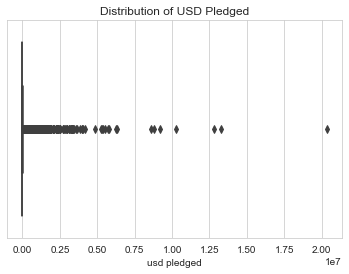

In [7]:
sns.boxplot(x="usd pledged", data=df_2018)
plt.title("Distribution of USD Pledged")

The distribution of the amount pledged looks heavily skewed with very large outliers. However, we shouldn't simply omit these outliers since they may be associated with the projects that are more successful. Because of this heavily skewed distribution, imputing with the mean would bias the data since it will be larger with the outlier. Therefore, median is a more accurate value to impute by, as it will be more representative of the data as a whole.

In [8]:
df_2018["usd pledged"] = df_2018["usd pledged"].fillna(df_2018["usd pledged"].median())

The *name* column only has a couple of missing values, so we will impute it with a placeholder of "No Name", since we shouldn't simply omit these projects as they may contain important information.

In [9]:
df_2018["name"] = df_2018["name"].fillna("No name")

In [10]:
# Check number of missing values again
df_2018.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

We will categorize failed and canceled projects as the same value, since projects are usually canceled due to a significant factor like insufficient funding, etc.

### Label Encoding
There are some nominal data values that are strings, but should be represented with a numerical value. This is useful for models to take in these values as inputs or predict them as outputs. To do this, we should encode groups in columns with a value.

We will consider failed and canceled projects to be the same, since if a project was canceled then there was likely a major factor causing it to shutdown, such as insufficient funding. Therefore, we can encode failed/canceled projects with a value of 0, and successful projects with 1.

In [11]:
df_2018["state"] = df_2018["state"].replace({"failed": 0, "canceled": 0, "successful": 1}).values

We set out to discover the importance of a kickstart's category to its success. We believed that projects in the technology category will be more successful. In order to determine if this is the case, projects in the technology category will be encoded with a 1, and all other categories with a 0.

In [13]:
# Distribution of main category of projects
df_2018["main_category"].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [14]:
def tech(category): 
    """
    Function used to transform main_category column to combine games and technology 
    
    :param category: project category
    :return: 1 or 0
    """
    cat = category.lower()
    if cat == "technology": 
        return 1 
    else: 
        return 0 

In [15]:
df_2018["main_category"] = df_2018["main_category"].apply(tech).values

### Datetime Representation
The dates and times of each project launch is an important factor that should be taken into consideration. Originially, the dates were represented as strings which isn't very useful and hard to work with. Pandas as a datetime object that we will convert each date to.

In [16]:
# Create a year and month column using launch date

# First convert launch date to datetime object 
df_2018["launched"] = pd.to_datetime(df_2018['launched'])

# Create a new column with just month of launch date
df_2018["month_launch"] = pd.DatetimeIndex(df_2018["launched"]).month

# Create a new column with just year of launch date
df_2018["year_launch"] = pd.DatetimeIndex(df_2018["launched"]).year

The deadline of a project is important as well, so we will do the same for each value in the *deadline* column.

In [18]:
# Create a year and month column using deadline date

# First convert deadline to datetime object 
df_2018["deadline"] = pd.to_datetime(df_2018["deadline"])

#Create a new column with just month of deadline
df_2018["month_deadline"] = pd.DatetimeIndex(df_2018["deadline"]).month

#Create a new column with just year of deadline
df_2018["year_deadline"] = pd.DatetimeIndex(df_2018["deadline"]).year

Having both launch and deadline date as datetime objects is very useful since we can work with them easily. The duration of a project could also be a crucial factor in its success, so we will create a new column that calculates how long each project lasted. This is called **feature engineering** and is useful for improving our model performance.

In [19]:
# Create a column of project duration
df_2018["duration"] = df_2018["deadline"] - df_2018["launched"]

Great! Now we can inspect our cleaned data to see what we've accomplished. The data should now be in a useable format to do further exploratory data analysis and modeling afterward.

In [20]:
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month_launch,year_launch,month_deadline,year_deadline,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,0,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,8,2015,10,2015,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,0,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,9,2017,11,2017,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,0,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,1,2013,2,2013,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,0,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,3,2012,4,2012,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,0,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,7,2015,8,2015,55 days 15:24:57


### Feature Selection
Now that we're done cleaning some of the columns, we don't need to use all of them for our analysis. The data contains a lot of useless information, like the currency for example, since we already have a value in USD for amount pledged. We only care about a few specific details of each project that are important to predicting whether it will be successful or not. Each feature should bring new and relevant information for each instance. Therefore, we will filter the columns to only those we need.

In [23]:
df_2018 = df_2018[['ID', 'name', 'main_category','deadline', 'goal', 'launched', 'month_launch', 
                         'year_launch', 'month_deadline', 'year_deadline', 'duration', 'state']]

print(df_2018.shape)
print("Columns: ", list(df_2018.columns))
df_2018.head()

(378661, 12)
Columns:  ['ID', 'name', 'main_category', 'deadline', 'goal', 'launched', 'month_launch', 'year_launch', 'month_deadline', 'year_deadline', 'duration', 'state']


,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,month_deadline,year_deadline,duration,state
0,1000002330,The Songs of Adelaide & Abullah,0,2015-10-09,1000.0,2015-08-11 12:12:28,8,2015,10,2015,58 days 11:47:32,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,0,2017-11-01,30000.0,2017-09-02 04:43:57,9,2017,11,2017,59 days 19:16:03,0
2,1000004038,Where is Hank?,0,2013-02-26,45000.0,2013-01-12 00:20:50,1,2013,2,2013,44 days 23:39:10,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,0,2012-04-16,5000.0,2012-03-17 03:24:11,3,2012,4,2012,29 days 20:35:49,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,0,2015-08-29,19500.0,2015-07-04 08:35:03,7,2015,8,2015,55 days 15:24:57,0


## Dataset 2

In [18]:
kickstarter = pd.read_csv('./data/kickstarter.csv')
print(kickstarter.shape)
kickstarter.head()

(430938, 30)


,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",failed


In [19]:
kickstarter.columns

Index(['Unnamed: 0', 'id', 'backers_count', 'blurb', 'currency', 'goal',
       'launched_at', 'deadline', 'location.country', 'name', 'usd_pledged',
       'slug', 'spotlight', 'staff_pick', 'static_usd_rate', 'state', 'year',
       'month', 'day', 'hour', 'days_to_deadline', 'goal_USD', 'category_name',
       'category_slug', 'blurb_length', 'location_type', 'location_country',
       'location_state', 'location_displayable_name', 'binary_state'],
      dtype='object')

In [20]:
kickstarter['category_slug'].value_counts()

film & video    57156
music           51178
games           48388
publishing      47175
technology      46682
art             34682
design          31808
fashion         30792
food            26194
comics          16270
photography     10404
theater          9927
crafts           9459
journalism       6650
dance            4173
Name: category_slug, dtype: int64

In [21]:
#Only need certain columns 
kickstarter_clean = kickstarter[['id', 'name','category_slug','deadline', 'goal', 
                                 'launched_at', 'month', 'year', 'state']]

In [22]:
#Rename columns and create deadline month and year 
kickstarter_clean.columns = ['ID', 'name', 'main_category','deadline', 'goal', 'launched', 'month_launch', 'year_launch', 'state']

In [23]:
kickstarter_clean.head(2)

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,state
0,857125548,Remix,art,2015-04-30 23:12:00,2000.0,2015-03-19 22:34:57,3,2015,failed
1,1038659700,Photo of Grant and Hazel eating cake with bare...,art,2014-07-27 01:55:07,10.0,2014-07-17 01:55:07,7,2014,failed


In [24]:
#Create the month and year deadline columns 

#First convert to datetime object 
kickstarter_clean['deadline'] = pd.to_datetime(kickstarter_clean['deadline'])

#Create a new column with just month 
kickstarter_clean['month_deadline'] = pd.DatetimeIndex(kickstarter_clean['deadline']).month

#Create a new column with just year 
kickstarter_clean['year_deadline'] = pd.DatetimeIndex(kickstarter_clean['deadline']).year

In [25]:
print(set(kickstarter_clean["state"]))

kickstarter_clean["state"] = kickstarter_clean["state"].replace({"canceled": 0, "failed": 0, "live": 1, "successful": 1, "suspended": 1})

print(set(kickstarter_clean["state"]))

{'successful', 'suspended', 'failed', 'live', 'canceled'}
{0, 1}


In [26]:
kickstarter_clean.head(2)

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,state,month_deadline,year_deadline
0,857125548,Remix,art,2015-04-30 23:12:00,2000.0,2015-03-19 22:34:57,3,2015,0,4,2015
1,1038659700,Photo of Grant and Hazel eating cake with bare...,art,2014-07-27 01:55:07,10.0,2014-07-17 01:55:07,7,2014,0,7,2014


In [27]:
#Fix the main_category column to be numerical  
kickstarter_clean['main_category'] = kickstarter_clean['main_category'].apply(tech).values

In [28]:
kickstarter_clean['main_category'].value_counts() 

0    384256
1     46682
Name: main_category, dtype: int64

In [29]:
kickstarter_clean.head(2)

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,state,month_deadline,year_deadline
0,857125548,Remix,0,2015-04-30 23:12:00,2000.0,2015-03-19 22:34:57,3,2015,0,4,2015
1,1038659700,Photo of Grant and Hazel eating cake with bare...,0,2014-07-27 01:55:07,10.0,2014-07-17 01:55:07,7,2014,0,7,2014


In [30]:
#Combining the two datasets kickstarter_clean and final_df_2018
frames = [kickstarter_clean, final_df_2018]
df = pd.concat(frames)
df.shape

(726303, 12)

In [31]:
#drop duplicates based off of ID column 
df_final = df.drop_duplicates(subset='ID', keep="first")

In [32]:
df_final['state'] = df_final['state'].replace({'undefined': 0, 'live': 1, 'suspended': 1})

In [33]:
df_final.shape

(407662, 12)

In [34]:
df_final.head()

,ID,deadline,duration,goal,launched,main_category,month_deadline,month_launch,name,state,year_deadline,year_launch
0,857125548,2015-04-30 23:12:00,NaT,2000.0,2015-03-19 22:34:57,0,4,3,Remix,0.0,2015,2015
1,1038659700,2014-07-27 01:55:07,NaT,10.0,2014-07-17 01:55:07,0,7,7,Photo of Grant and Hazel eating cake with bare...,0.0,2014,2014
2,1238331911,2014-08-29 16:29:13,NaT,900.0,2014-07-30 16:29:13,0,8,7,Minecraft Digital Art/Animations,0.0,2014,2014
3,189217262,2015-05-31 16:09:11,NaT,900.0,2015-05-11 16:09:11,0,5,5,Sacramento Nature Photograph Series,0.0,2015,2015
4,1260075071,2015-03-08 20:52:02,NaT,15000.0,2015-02-06 21:52:02,0,3,2,North Africa art project - my dream,0.0,2015,2015


# Data Analysis & Results

Include cells that describe the steps in your data analysis!!!!!!!!!!

In [35]:
final_df_2018.head(1)

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,month_deadline,year_deadline,duration,state
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,0,2017-11-01,30000.0,2017-09-02 04:43:57,9,2017,11,2017,59 days 19:16:03,0


### Descriptive Analysis 
In this section, we will perform descriptive analysis on the features in the data and describe their meaning and context within the overall dataset. This will help us understand which features are more important in predicting a project's success or failure.

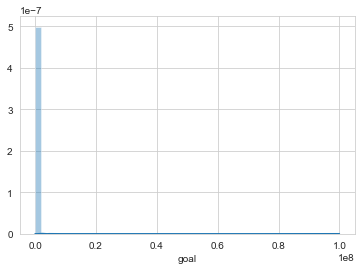

In [36]:
sns.distplot(final_df_2018["goal"], norm_hist=True)

There appears to be outliers in the project goal feature, which is how much money they want to raise! A reason may be that some projects require significantly more funding than others based on their project details. This may be explained by the project category, which we will explore later. For now, we need to find and handle the outliers.

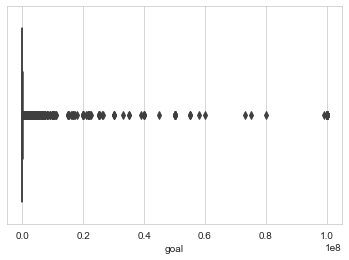

In [37]:
sns.boxplot(x="goal", data=final_df_2018)

The main_category label is binary, with 1 meaning the project category is *Technology* and 0 otherwise. As seen in the previous plots, there may be an association between the project category and its funding goal. Technology projects may require more to be successful. We can perform bivariate analysis to see.

In [38]:
#Bivarate analysis (groupby)
final_df_2018.groupby("main_category").mean()[["goal"]]

,goal
main_category,
0,39209.758589
1,100417.110626


As expected, it appears that technology projects have a much higher average funding goal than non-technology projects. The difference appears very significant, as technology projects have more than twice the average funding goal than other projects.

In [39]:
print("Launch Years of Projects:")
print(sorted(set(final_df_2018["year_launch"])))

print("Project Deadlines:")
print(sorted(set(final_df_2018["year_deadline"])))

Launch Years of Projects:
[1970, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Project Deadlines:
[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


Average duration of projects in days:  33.72137524757503


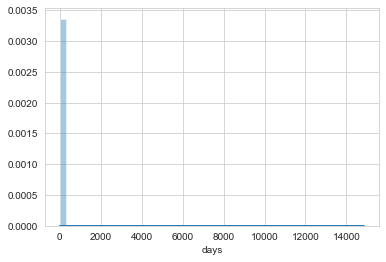

In [40]:
final_df_2018["days"] = final_df_2018["duration"].apply(lambda x: x.days)
print("Average duration of projects in days: ", np.mean(final_df_2018["days"]))
sns.distplot(final_df_2018["days"], norm_hist=True)

In [41]:
final_df_2018.groupby("main_category").mean()[["days"]]

,days
main_category,
0,33.660640
1,34.492649


In [42]:
final_df_2018[final_df_2018["main_category"] == 1].head()

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,month_deadline,year_deadline,duration,state,days
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,1,2016-03-25,87000.0,2016-02-29 20:30:27,2,2016,3,2016,24 days 03:29:33,0,24
71,1000261018,Diposta - liberating people from their postal ...,1,2016-08-23,100000.0,2016-07-24 13:18:36,7,2016,8,2016,29 days 10:41:24,0,29
112,1000468345,iRNinja - Control your TV with a simple press ...,1,2017-06-14,500.0,2017-05-10 16:00:18,5,2017,6,2017,34 days 07:59:42,0,34
127,1000535116,Xi3: Help us Usher in the Post-PC Era,1,2012-10-28,250000.0,2012-09-28 09:33:59,9,2012,10,2012,29 days 14:26:01,0,29
135,1000558429,Sellegg start up classified site,1,2016-03-20,15000.0,2016-03-02 02:13:52,3,2016,3,2016,17 days 21:46:08,0,17


In [43]:
final_df_2018[final_df_2018["days"] > 1000]

,ID,name,main_category,deadline,goal,launched,month_launch,year_launch,month_deadline,year_deadline,duration,state,days
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),0,2010-09-15,5000.0,1970-01-01 01:00:00,1,1970,9,2010,14866 days 23:00:00,0,14866
48147,1245461087,1st Super-Size Painting - Social Network Owned...,0,2010-08-14,15000.0,1970-01-01 01:00:00,1,1970,8,2010,14834 days 23:00:00,0,14834
75397,1384087152,"""ICHOR"" (Canceled)",0,2010-05-21,700.0,1970-01-01 01:00:00,1,1970,5,2010,14749 days 23:00:00,0,14749
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",0,2010-06-01,4000.0,1970-01-01 01:00:00,1,1970,6,2010,14760 days 23:00:00,0,14760
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",0,2010-05-04,10000.0,1970-01-01 01:00:00,1,1970,5,2010,14732 days 23:00:00,0,14732
273779,462917959,Identity Communications Infographic (Canceled),0,2010-04-10,500.0,1970-01-01 01:00:00,1,1970,4,2010,14708 days 23:00:00,0,14708


### Exploratory Analysis 

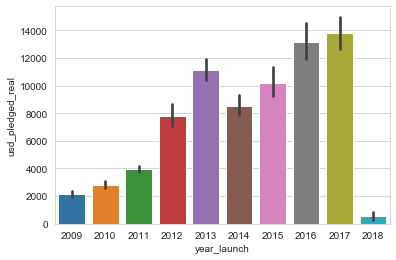

In [44]:
df_2018 = df_2018[df_2018['year_launch'] > 1970]
sns.barplot(x=df_2018['year_launch'], y=df_2018['usd_pledged_real'])

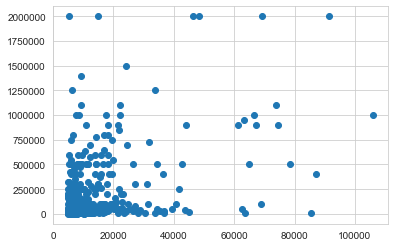

In [45]:
df_2018 = df_2018[df_2018['backers'] < 150000]
df_2018 = df_2018[df_2018['backers'] > 5000]
plt.scatter(df_2018['backers'], df_2018['usd_goal_real'])
a2, b2 = np.polyfit(df_2018['backers'], df_2018['usd_goal_real'], 1)

In [46]:
floats = a2 * np.arange(df_2018['backers'].min(), df_2018['backers'].max(), 1) + b2
pred_goal = floats

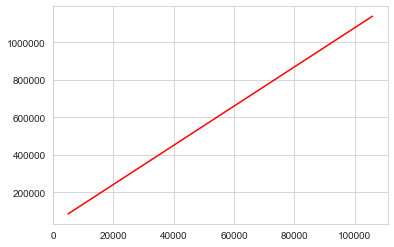

In [47]:
plt.plot(np.arange(df_2018['backers'].min(),df_2018['backers'].max(),1), pred_goal, color='RED')

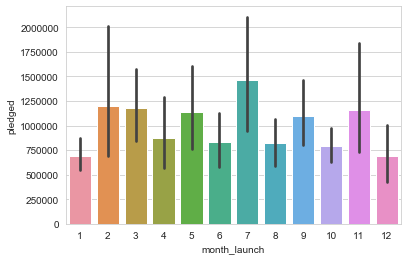

In [48]:
sns.barplot(x=final_df_2018['month_launch'], y=(df_2018['pledged']))

### Prediction

In [50]:
df_final.head()

,ID,deadline,duration,goal,launched,main_category,month_deadline,month_launch,name,state,year_deadline,year_launch
0,857125548,2015-04-30 23:12:00,NaT,2000.0,2015-03-19 22:34:57,0,4,3,Remix,0.0,2015,2015
1,1038659700,2014-07-27 01:55:07,NaT,10.0,2014-07-17 01:55:07,0,7,7,Photo of Grant and Hazel eating cake with bare...,0.0,2014,2014
2,1238331911,2014-08-29 16:29:13,NaT,900.0,2014-07-30 16:29:13,0,8,7,Minecraft Digital Art/Animations,0.0,2014,2014
3,189217262,2015-05-31 16:09:11,NaT,900.0,2015-05-11 16:09:11,0,5,5,Sacramento Nature Photograph Series,0.0,2015,2015
4,1260075071,2015-03-08 20:52:02,NaT,15000.0,2015-02-06 21:52:02,0,3,2,North Africa art project - my dream,0.0,2015,2015


In [51]:
outcome, predictors = patsy.dmatrices("state ~ main_category + month_launch + year_launch + goal", df_final)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(outcome)
print(predictors)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[1.000e+00 0.000e+00 3.000e+00 2.015e+03 2.000e+03]
 [1.000e+00 0.000e+00 7.000e+00 2.014e+03 1.000e+01]
 [1.000e+00 0.000e+00 7.000e+00 2.014e+03 9.000e+02]
 ...
 [1.000e+00 0.000e+00 2.000e+00 2.012e+03 1.700e+03]
 [1.000e+00 0.000e+00 9.000e+00 2.014e+03 5.000e+04]
 [1.000e+00 1.000e+00 1.000e+00 2.016e+03 1.500e+04]]


In [52]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  state   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     6725.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:33:01   Log-Likelihood:            -2.8284e+05
No. Observations:              407662   AIC:                         5.657e+05
Df Residuals:                  407657   BIC:                         5.657e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -106.0243      0.683   -155.341

From the above, we can see that, with an alpha value of .01, year seems to be significant factor of success compared to all other categories. However, since our predictions are binary, the best approach would be to try logistic regression.

In [53]:
outcomeLog, predictorsLog = patsy.dmatrices("state ~ main_category + month_launch + year_launch + goal", df_final)
modLog = sm.Logit(outcomeLog, predictorsLog)
resLog = modLog.fit()
print(resLog.summary())

Optimization terminated successfully.
         Current function value: 0.661031
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:               407662
Model:                          Logit   Df Residuals:                   407657
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                 0.04628
Time:                        14:33:11   Log-Likelihood:            -2.6948e+05
converged:                       True   LL-Null:                   -2.8255e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -450.4404      3.028   -148.754      0.000    -456.375    -444.505
main_category    -0.

Again, we see that year is more significant than all other categories even when using logistic regression. So, launch year could be a significant factor when determining success for kickstarter projects.

### Hypothesis Test 

Null hypothesis: The success rate for technology kickstarters is the same as all others. 

Alternative hypthesis: The success rate for technology is different from all others.

In [54]:
#Test here 
h_tech = df_final[df_final['main_category'] == 1]['state'].values
h_nontech = df_final[df_final['main_category'] == 0]['state'].values
t_val, p_val = ttest_ind(h_tech, h_nontech)
if p_val < 0.01:
    print('There is a significant difference between the two.')
else:
    print('There is not a significant difference between the two')
    
#print(pd.DataFrame(h_tech)[0].value_counts())
#print(pd.DataFrame(h_nontech)[0].value_counts())

h_techsuccess = pd.DataFrame(h_tech)[0].value_counts()[1.0]
h_techfailures = pd.DataFrame(h_tech)[0].value_counts()[0.0]
h_nontechsuccess = pd.DataFrame(h_nontech)[0].value_counts()[1.0]
h_nontechfailures = pd.DataFrame(h_nontech)[0].value_counts()[0.0]

techsuccesspercent = h_techsuccess/(h_techsuccess + h_techfailures)
nontechsuccesspercent = h_nontechsuccess/(h_nontechfailures + h_nontechsuccess)

print("The success rate for technology is: ", techsuccesspercent)
print("The success rate for all other categories are: ", nontechsuccesspercent)



There is a significant difference between the two.
The success rate for technology is:  0.4088193857424627
The success rate for all other categories are:  0.5135098825274336


From this we can see that there is actually a significant difference between the technology categories and all other categories. Therefore, we may reject the null hypothesis, as there is a significant difference. As shown, the difference of success rate is roughly 11% more for all other categories.

Furthermore, from the logistic regression and the linear regression tests that are done on the data we can see that, using an alpha value of .01, launch year is much more significant for success than category is.

# Ethics & Privacy

Searching through Kickstarter, the majority of participants are startups consisting of a small workforce. We must pursue our project in a manner that is both equitable on both the website and the startups. Another stakeholder is the backers (investors) of the project, these are listed anonymously on the website, but still should be considered in the process. It is important to consider these stakeholders, as associating their names to this analysis could harm their reputation, whether it would be the individual workers or the company itself. One way to protect this is to remove any startup names and to generalize startups into categories. By not disclosing the information of name, so that PII cannot be obtained by connecting the name of startup with the individual workers. Furthermore, we will store the data in a secure google drive for only group members in order to retain any private information.

Moreover, we have to take into consideration the reliability of the data. Kickstarter is a third party in the transactions of startups and donators. Kickstarter gives us access to these data metrics and so it is less likely to hold misinformation about backers. However, biases still need to be considered, such as who the investors are. When dealing with our analysis, we must be wary to not make quick conclusive statements on causation of our findings, there are many confounding variables to be considered, such as time released of the project. We will continue to monitor our models to see whether there are biases involved or confounding variables not checked.


# Conclusion & Discussion

From our hypothesis testing, we concluded that there is a significant difference in the success rates of tech kickstarter campaigns compared to non-tech kickstarter campaigns, with a 11% difference in favor of non-tech kickstarters. This does not coincide with the hypothesis we made at the start of the project. Reasons for this could an over saturation for kickstarter campaigns that are related to tech and, therefore, success favors kickstarters that demonstrate uniqueness and creativeness. Moreover, our descriptive analysis illustrated that the goal amount in USD on average was significantly higher. This could be another reason towards the logic of our final conclusion, the required monetary goals were harder to reach and succeed for tech-related kickstarters. 

This leads onto one of the limitations of our analysis, which was the way in which we valued a campaign’s success. We evaluated campaigns’ success with binary values on whether the campaigns reached their goal amount in USD or not. This was not reliable, because as shown by our outliers some campaigns set the amount goal to a significantly large number. Another limitation was the kickstarter could set the deadline themselves and therefore, the time limit for their own campaigns could be unlimited. Therefore, a measurement that would have been more representative of a measurement of success would have been the amount raised during the first month of all campaigns. Moreover, there are many ways to define the measurement of success. Following from our analysis, our group could have looked into profit margins, amount goal raised or total sales.

However, what was more interesting to the case of our project was the takeaway that launch year was the most significant variable out of all the variables we considered. With such significance, our group could have further analyzed the prospect of launch year being a cofounder in our analysis. Tech campaigns would have most likely increased proportionately in throughout the years. On the other hand the success rates could have also increased proportionately. Therefore, we could have took this into account into our hypothesis testing through utilizing an instrumental variable.

For further analysis, we would look into other startup incubator methods, such as angel investors. From there, we could compare different incubators and compare their success rates and analyze the optimal solutions for raising money for various startups.